<KeysViewHDF5 ['ANCILLARY_DATA', 'BROWSE', 'Data_1HZ', 'Data_40HZ', 'METADATA']>
<KeysViewHDF5 ['Time', 'Quality', 'Geolocation', 'Elevation_Surfaces', 'Elevation_Corrections', 'Elevation_Angles', 'Elevation_Offsets', 'Elevation_Flags', 'Transmit_Energy', 'Geophysical', 'Reflectivity', 'Waveform', 'Atmosphere', 'DS_DEMhiresArElv', 'DS_UTCTime_40']>
<KeysViewHDF5 ['d_elev', 'd_IceSVar', 'd_refRng']>
<KeysViewHDF5 ['d_lat', 'd_lon']>


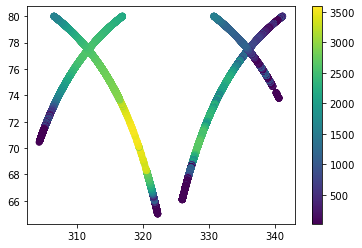

In [22]:
import h5py
from matplotlib import pyplot as plt

# Open the file
f = h5py.File('GLAH12_634_2111_003_0365_0_01_0001.H5', 'r')

# Show the contents of the file
print(f.keys())

# Show the contents of the Data_40HZ group
print(f['Data_40HZ'].keys())

# Show the contents of the Elevation_Surfaces group
print(f['Data_40HZ']['Elevation_Surfaces'].keys())

# Show the contents of the Geolocation group
print(f['Data_40HZ']['Geolocation'].keys())

# Extract the latitude, longitude, and elevation
lat = f['Data_40HZ']['Geolocation']['d_lat'][:]
lon = f['Data_40HZ']['Geolocation']['d_lon'][:]
elev = f['Data_40HZ']['Elevation_Surfaces']['d_elev'][:]

# Remove the invalid data
valid = (lat < 1e8) & (lon < 1e8)
lat = lat[valid]
lon = lon[valid]
elev = elev[valid]

# Select the data within a bounding box
bbox = (lat > 65) & (lat < 80) & (lon > 300) & (lon < 355)
lat = lat[bbox]
lon = lon[bbox]
elev = elev[bbox]

# Plot a scatter plot of the elevation data
plt.scatter(lon, lat, c=elev)
plt.colorbar()

# Close the file
f.close()
